## Household Power Consumption Predition
### Goal:
#### - The objective is to determine which features are indicators of energy consumption.

### Variable Information:

Where indicated, hourly data from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

- `date`: year-month-day hour:minute:second<br>
- `Appliances`: energy use in Wh<br>
- `lights`:  energy use of light fixtures in the house in Wh<br>
- `T1`: Temperature in kitchen area, in Celsius<br>
- `RH1`: Humidity in kitchen area, in %<br>
- `T2`: Temperature in living room area, in Celsius<br>
- `RH2`: Humidity in living room area, in %<br>
- `T3`: Temperature in laundry room area<br>
- `RH3`: Humidity in laundry room area, in %<br>
- `T4`:  Temperature in office room, in Celsius<br>
- `RH4`: Humidity in office room, in %<br>
- `T5`:  Temperature in bathroom, in Celsius<br>
- `RH5`: Humidity in bathroom, in %<br>
- `T6`: Temperature outside the building (north side), in Celsius<br>
- `RH6`: Humidity outside the building (north side), in %<br>
- `T7`: Temperature in ironing room , in Celsius<br>
- `RH7`: Humidity in ironing room, in %<br>
- `T8`: Temperature in teenager room 2, in Celsius<br>
- `RH8`: Humidity in teenager room 2, in %<br>
- `T9`: Temperature in parents room, in Celsius<br>
- `RH9`: Humidity in parents room, in %<br>
- `Tout`: Temperature outside (from Chievres weather station), in Celsius<br>
- `Pressure`: (from Chievres weather station), in mm Hg<br>
- `RHout`: Relative Humidity outside (from Chievres weather station), in %<br>
- `Wind speed`: (from Chievres weather station), in m/s<br>
- `Visibility`: (from Chievres weather station), in km<br>
- `Tdewpoint`: Dew point temperature (from Chievres weather station), Â°C<br>
- `rv1`: Random variable 1, non-dimensional(whether use it or not)<br>
- `rv2`: Random variable 2, non-dimensional(whether use it or not)<br>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from IPython.display import display
import statistics

In [2]:
df = pd.read_csv('KAG_energydata_complete.csv')

In [3]:
pd.options.display.max_columns = None
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


#### Step
- Visualizing Per day consumption
- Checking distribution of features
- Defiine dependent and independent variables
- Correlation analysis
Briefly Present first result

- Spliting test data, training set
- Build prediction model (Regression, Adaboost, Radom forest)
- Check accurancy and Hyperparameter tuning

## Step1 : EDA (Exploratory Data Analysis)

In [4]:
display(df.isnull().sum())
df.shape

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

(19735, 29)

Comment:
- No empty value with 19,735 entries

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

Comment:
- There are no categorical feature in the data. There are two 'int' features which might be categorical data. We will check it later.
- Since there is no information about the rv1, rv2 and what it denotes. We will discard it.
- There are in total 29 variables out of which 28 are independent variables and 1 is dependent which is our target variable (Appliances).

In [6]:
df = df.drop(['rv1','rv2'],axis=1)
df.describe().round(3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
count,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000
mean,97.695,3.802,21.687,40.260,20.341,40.420,22.268,39.243,20.855,39.027,19.592,50.949,7.911,54.609,20.267,35.388,22.029,42.936,19.486,41.552,7.412,755.523,79.750,4.040,38.331,3.761
std,102.525,7.936,1.606,3.979,2.193,4.070,2.006,3.255,2.043,4.341,1.845,9.022,6.090,31.150,2.110,5.114,1.956,5.224,2.015,4.151,5.317,7.399,14.901,2.451,11.795,4.195
min,10.000,0.000,16.790,27.023,16.100,20.463,17.200,28.767,15.100,27.660,15.330,29.815,-6.065,1.000,15.390,23.200,16.307,29.600,14.890,29.167,-5.000,729.300,24.000,0.000,1.000,-6.600
25%,50.000,0.000,20.760,37.333,18.790,37.900,20.790,36.900,19.530,35.530,18.278,45.400,3.627,30.025,18.700,31.500,20.790,39.067,18.000,38.500,3.667,750.933,70.333,2.000,29.000,0.900
50%,60.000,0.000,21.600,39.657,20.000,40.500,22.100,38.530,20.667,38.400,19.390,49.090,7.300,55.290,20.033,34.863,22.100,42.375,19.390,40.900,6.917,756.100,83.667,3.667,40.000,3.433
75%,100.000,0.000,22.600,43.067,21.500,43.260,23.290,41.760,22.100,42.157,20.620,53.663,11.256,83.227,21.600,39.000,23.390,46.536,20.600,44.338,10.408,760.933,91.667,5.500,40.000,6.567
max,1080.000,70.000,26.260,63.360,29.857,56.027,29.236,50.163,26.200,51.090,25.795,96.322,28.290,99.900,26.000,51.400,27.230,58.780,24.500,53.327,26.100,772.300,100.000,14.000,66.000,15.500


In [7]:
import time
import dateutil
import warnings
warnings.filterwarnings('ignore')
                              
df['Date']=df['date'].str.split(' ').str[0]
df["Days"]=(df['Date'].str.split(' ').str[0])
df["Days"]=(df['Days'].apply(dateutil.parser.parse, dayfirst=True))
df["Days_num"]=(df['Days'].dt.dayofweek).astype(str).astype(int)
df["Days"]=(df['Days'].dt.day_name())

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['Month'] = df.date.dt.month
df['Hour'] = df.date.dt.hour

In [9]:
df = df.drop(['date'],axis=1)
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Date,Days,Days_num,Month,Hour
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,2016-01-11,Tuesday,1,1,17
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,2016-01-11,Tuesday,1,1,17
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,2016-01-11,Tuesday,1,1,17
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,2016-01-11,Tuesday,1,1,17
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,2016-01-11,Tuesday,1,1,17


## Step2 : Checking Distribution of Data

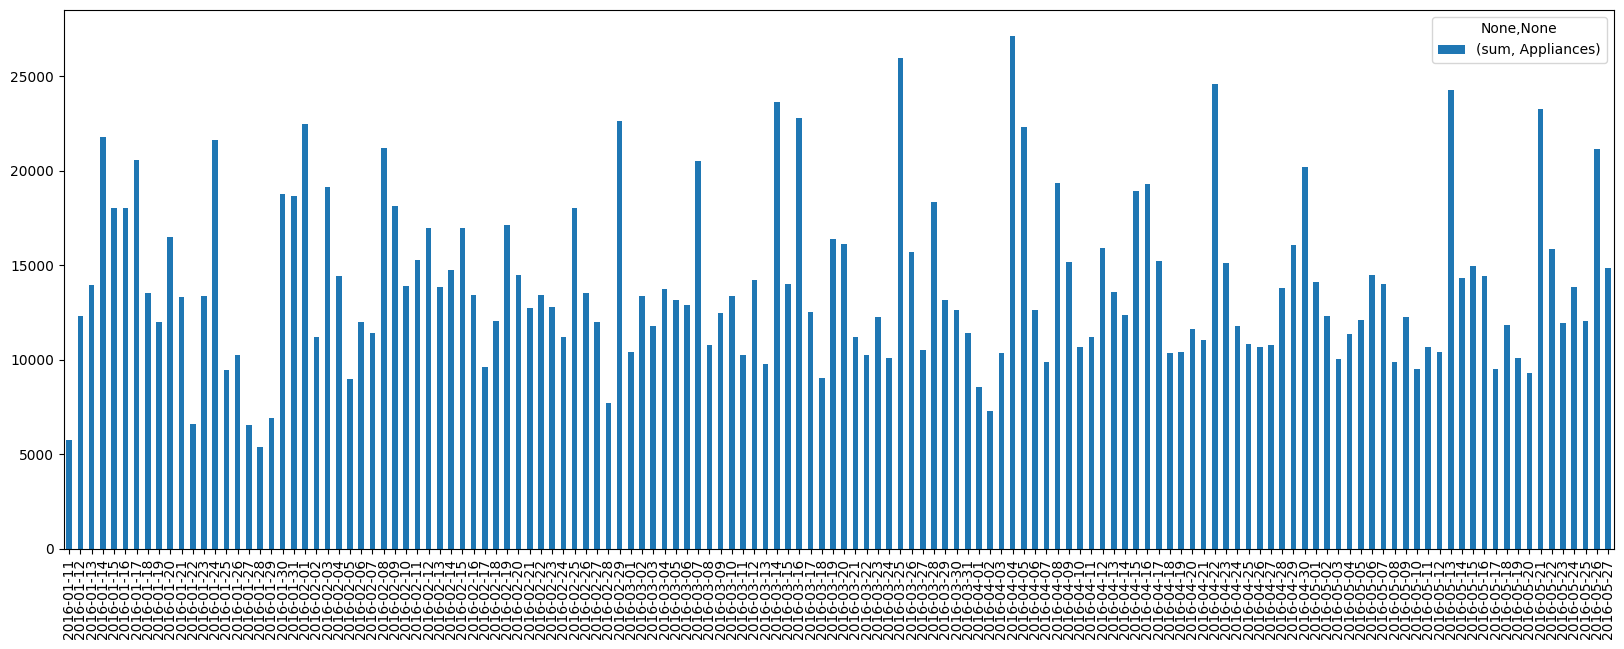

In [10]:
dates=df["Date"].unique()
arranged_day = pd.Categorical(df["Date"], categories=dates,ordered=True)
date_series = pd.Series(arranged_day)
table = pd.pivot_table(df,
               values="Appliances",index=date_series,
               aggfunc=[np.sum],fill_value=0)
table.plot(kind="bar",figsize=(20, 7))
plt.show()

Comment:
- The traces shows that there is varaiation of electric usage on daily basis.
- Check by hours below

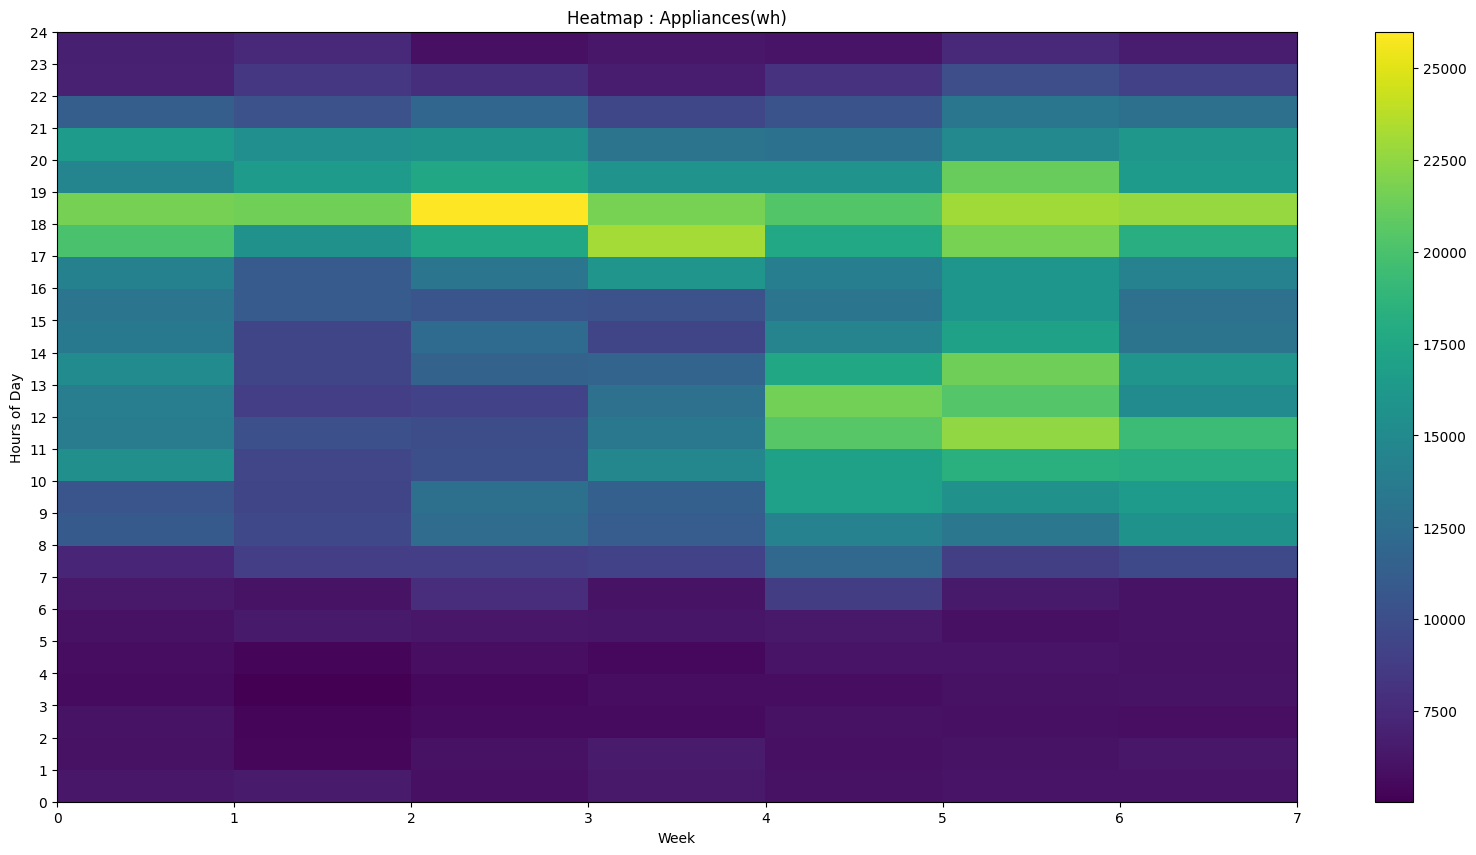

In [11]:
days=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Saturday","Sunday"]
arranged_day = pd.Categorical(df["Days"], categories=days,ordered=True)
day_series = pd.Series(arranged_day)
table = pd.pivot_table(df,index=["Hour"],
               values="Appliances",columns=day_series,
               aggfunc=[np.sum],fill_value=0)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Heatmap : Appliances(wh)')

heatmap = ax.pcolor(table)

ax.set_xlabel("Week Days")
ax.set_ylabel("Hours")

plt.colorbar(heatmap)
ax.set_yticks(range(len(table.index)+1))
ax.set_xticks(range(len(table.columns)+1))

plt.xlabel("Week")
plt.ylabel("Hours of Day")
plt.show()

Comment:
- By Hour Wise Daily Consumption we also saw a trend in hourly(17:00 to 22:00) consumption.
- We can see the higher power consumption from Friday to Sunday either.

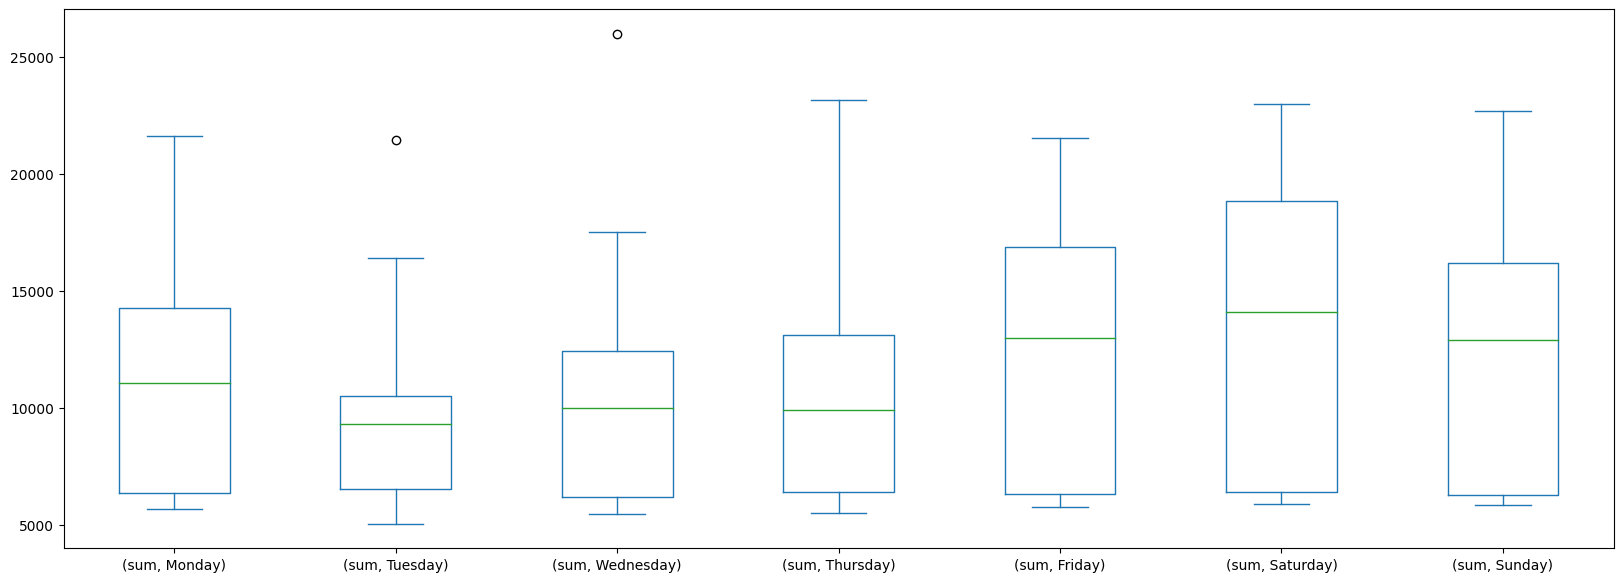

In [12]:
table.plot.box(figsize=(20, 7))
table=df[["Appliances",'lights', 'T1', 'RH_1',"Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint",'Hour','Days_num']]

In [13]:
# Seggregate the columns based on its category.
temp_cols = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
humidity_cols = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
weather_cols = ["T_out", "Tdewpoint","RH_out","Press_mm_hg","Windspeed","Visibility"] 
light_cols = ["lights"]
date_time_cols = ['Month', 'Days', 'Days_num', 'Hour']
target = ["Appliances"]

In [14]:
df.describe().round(3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Days_num,Month,Hour
count,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000
mean,97.695,3.802,21.687,40.260,20.341,40.420,22.268,39.243,20.855,39.027,19.592,50.949,7.911,54.609,20.267,35.388,22.029,42.936,19.486,41.552,7.412,755.523,79.750,4.040,38.331,3.761,3.067,3.102,11.502
std,102.525,7.936,1.606,3.979,2.193,4.070,2.006,3.255,2.043,4.341,1.845,9.022,6.090,31.150,2.110,5.114,1.956,5.224,2.015,4.151,5.317,7.399,14.901,2.451,11.795,4.195,1.997,1.339,6.922
min,10.000,0.000,16.790,27.023,16.100,20.463,17.200,28.767,15.100,27.660,15.330,29.815,-6.065,1.000,15.390,23.200,16.307,29.600,14.890,29.167,-5.000,729.300,24.000,0.000,1.000,-6.600,0.000,1.000,0.000
25%,50.000,0.000,20.760,37.333,18.790,37.900,20.790,36.900,19.530,35.530,18.278,45.400,3.627,30.025,18.700,31.500,20.790,39.067,18.000,38.500,3.667,750.933,70.333,2.000,29.000,0.900,1.000,2.000,6.000
50%,60.000,0.000,21.600,39.657,20.000,40.500,22.100,38.530,20.667,38.400,19.390,49.090,7.300,55.290,20.033,34.863,22.100,42.375,19.390,40.900,6.917,756.100,83.667,3.667,40.000,3.433,3.000,3.000,12.000
75%,100.000,0.000,22.600,43.067,21.500,43.260,23.290,41.760,22.100,42.157,20.620,53.663,11.256,83.227,21.600,39.000,23.390,46.536,20.600,44.338,10.408,760.933,91.667,5.500,40.000,6.567,5.000,4.000,17.000
max,1080.000,70.000,26.260,63.360,29.857,56.027,29.236,50.163,26.200,51.090,25.795,96.322,28.290,99.900,26.000,51.400,27.230,58.780,24.500,53.327,26.100,772.300,100.000,14.000,66.000,15.500,6.000,5.000,23.000


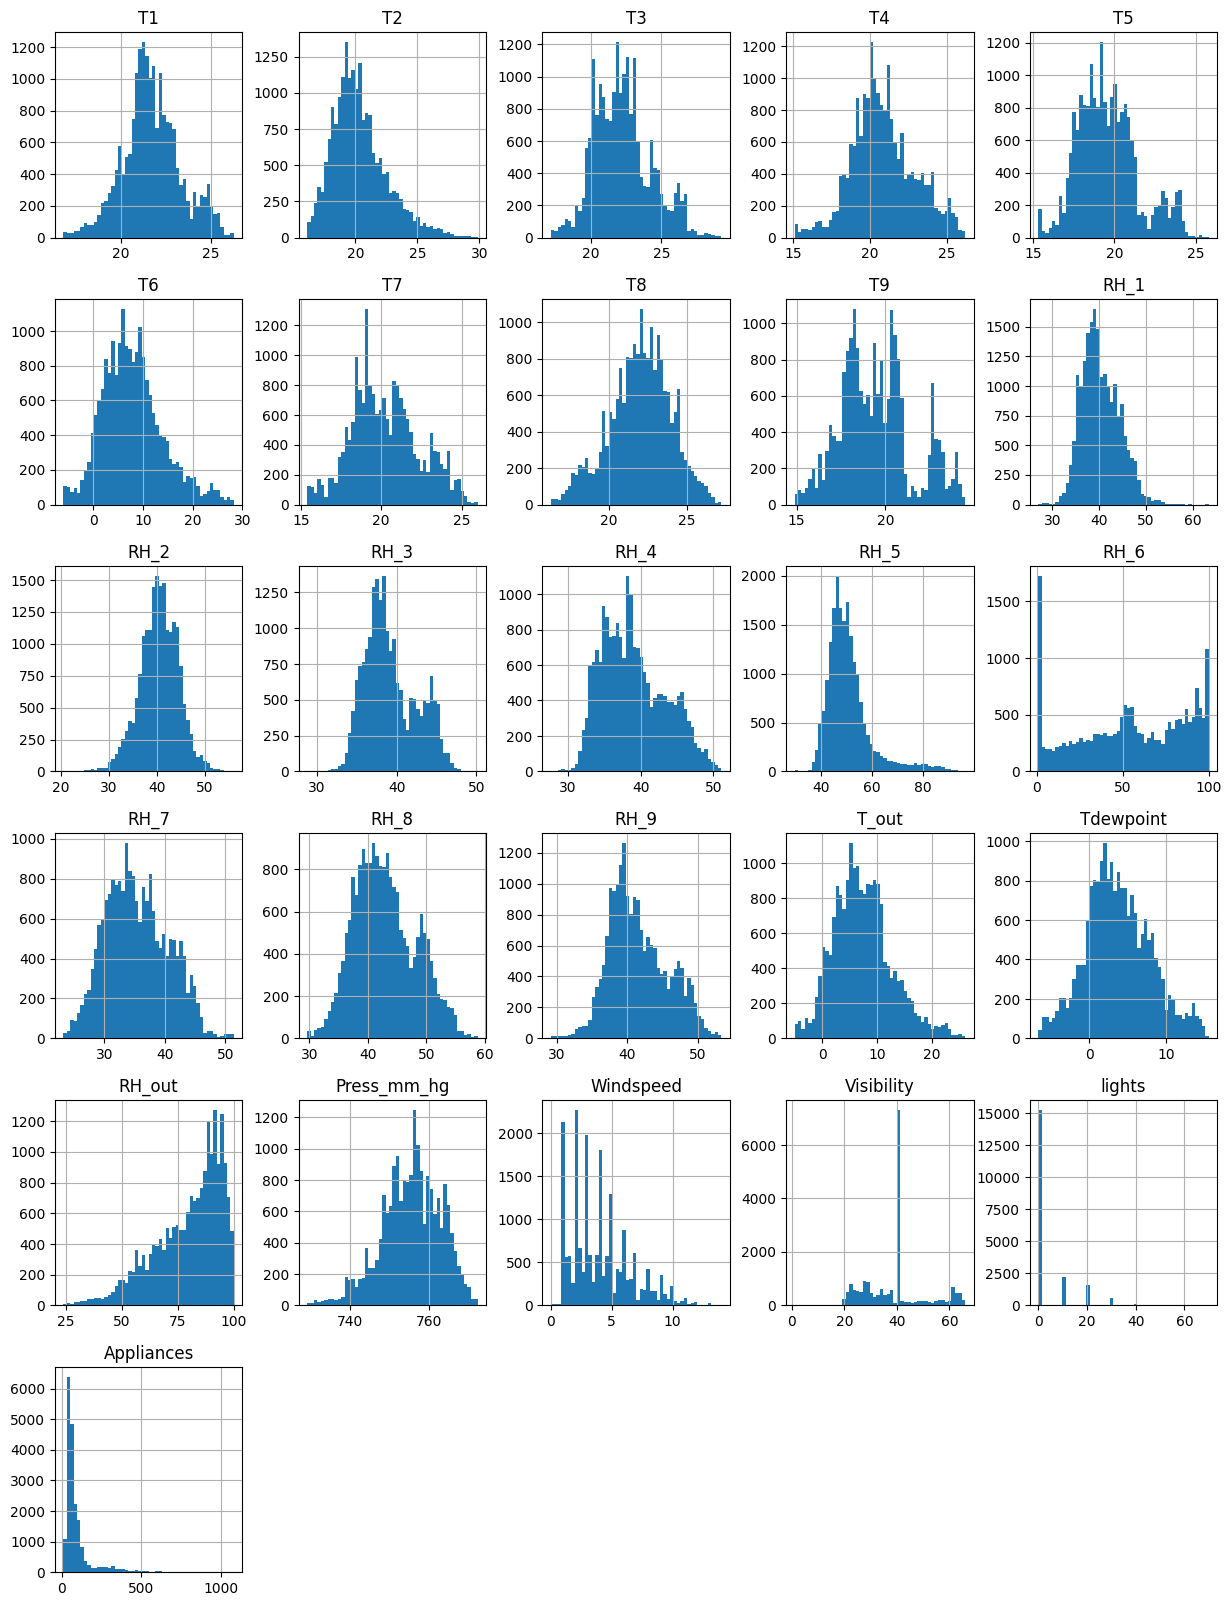

In [15]:
df[temp_cols+ humidity_cols+ weather_cols+ light_cols+ target].hist(bins=50, figsize=(15,20));

Our target variable `Applieances` has skewed distribution, check outliers and remove.

### Outliers Removal

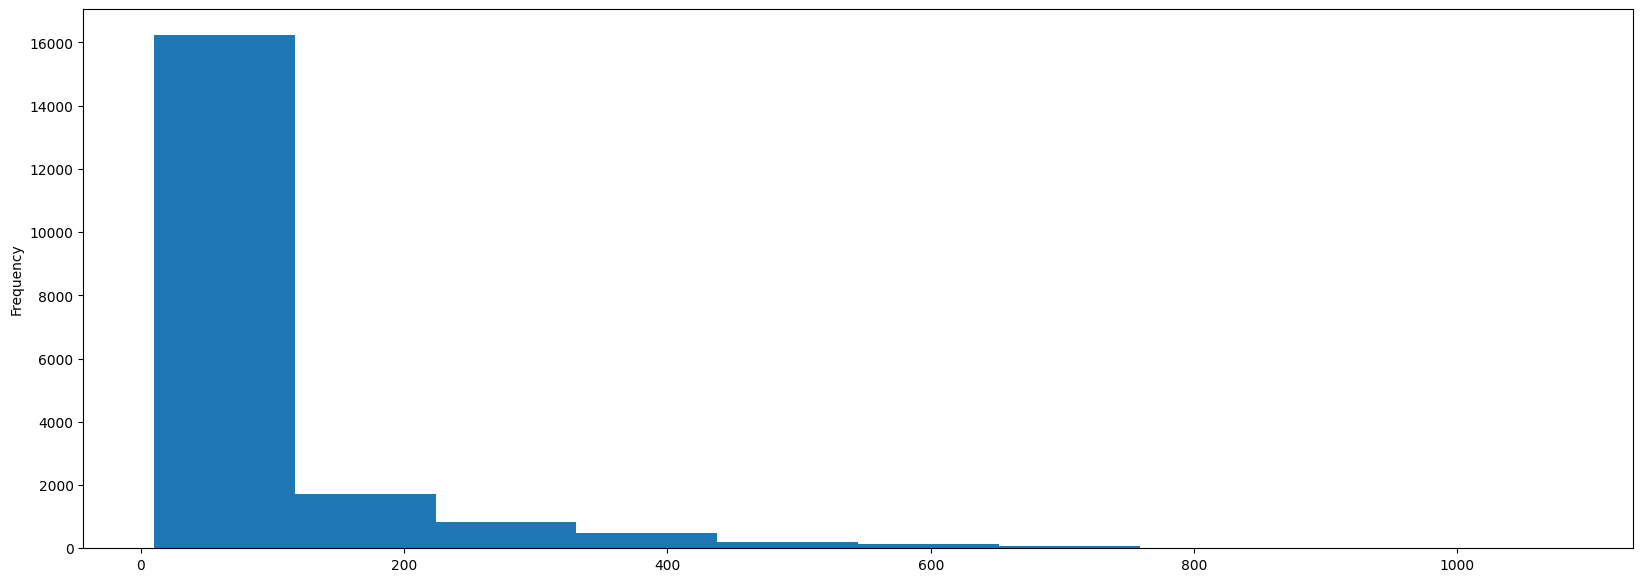

In [16]:
# Check the dustribution of Appliances
df['Appliances'].plot(kind="hist",figsize=(20, 7))
plt.show()

In [17]:
X = df[['Appliances']]
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
print("Outlier threshold of variable ",IQR)

dfOutlier = X.describe()
outlierSet=set()
for column in dfOutlier.columns:
    Q1 = dfOutlier[column]['25%']
    Q3 = dfOutlier[column]['75%']
    IQR = Q3 - Q1
    outlierDf= ( ((X[column] < (Q1 - 1.5 * IQR)) |(X[column] > (Q3 + 1.5 * IQR))) )
    outlierSet.update(set(outlierDf[outlierDf==True].index))
        
df.drop(outlierSet, inplace=True, axis=0)

Outlier threshold of variable  Appliances    50.0
dtype: float64


In [18]:
df.describe().round(3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Days_num,Month,Hour
count,17597.00,17597.000,17597.000,17597.000,17597.000,17597.000,17597.000,17597.000,17597.000,17597.000,17597.000,17597.000,17597.000,17597.000,17597.00,17597.000,17597.000,17597.000,17597.000,17597.000,17597.000,17597.000,17597.000,17597.000,17597.000,17597.000,17597.000,17597.000,17597.000
mean,67.21,3.426,21.687,40.141,20.289,40.473,22.226,39.160,20.859,38.984,19.610,50.984,7.745,54.933,20.28,35.437,22.050,43.025,19.504,41.554,7.302,755.571,80.293,3.969,38.311,3.760,3.045,3.123,11.201
std,28.48,7.529,1.604,3.928,2.169,4.062,1.966,3.221,2.048,4.322,1.837,8.999,6.028,30.700,2.10,5.080,1.962,5.200,2.011,4.164,5.290,7.340,14.759,2.448,11.963,4.188,1.996,1.339,7.133
min,10.00,0.000,16.790,27.023,16.100,20.463,17.200,28.767,15.100,27.660,15.330,29.815,-6.065,1.000,15.39,23.290,16.307,29.600,14.890,29.167,-5.000,729.367,24.000,0.000,1.000,-6.600,0.000,1.000,0.000
25%,50.00,0.000,20.760,37.233,18.790,37.933,20.790,36.827,19.567,35.500,18.290,45.400,3.467,31.290,18.70,31.562,20.840,39.200,18.067,38.530,3.500,751.000,71.333,2.000,29.000,0.933,1.000,2.000,5.000
50%,60.00,0.000,21.600,39.530,19.927,40.560,22.100,38.467,20.667,38.363,19.390,49.090,7.157,55.290,20.10,34.900,22.167,42.463,19.390,40.863,6.850,756.100,84.500,3.500,40.000,3.433,3.000,3.000,11.000
75%,80.00,0.000,22.600,42.860,21.463,43.327,23.290,41.560,22.100,42.090,20.600,53.833,11.063,83.009,21.60,39.054,23.390,46.590,20.600,44.290,10.333,760.950,92.000,5.333,40.000,6.550,5.000,4.000,17.000
max,170.00,50.000,26.200,59.633,29.857,56.027,29.100,49.657,26.200,51.000,25.795,96.322,28.290,99.900,25.89,51.400,27.230,58.780,24.500,53.327,26.100,772.267,100.000,14.000,66.000,15.500,6.000,5.000,23.000


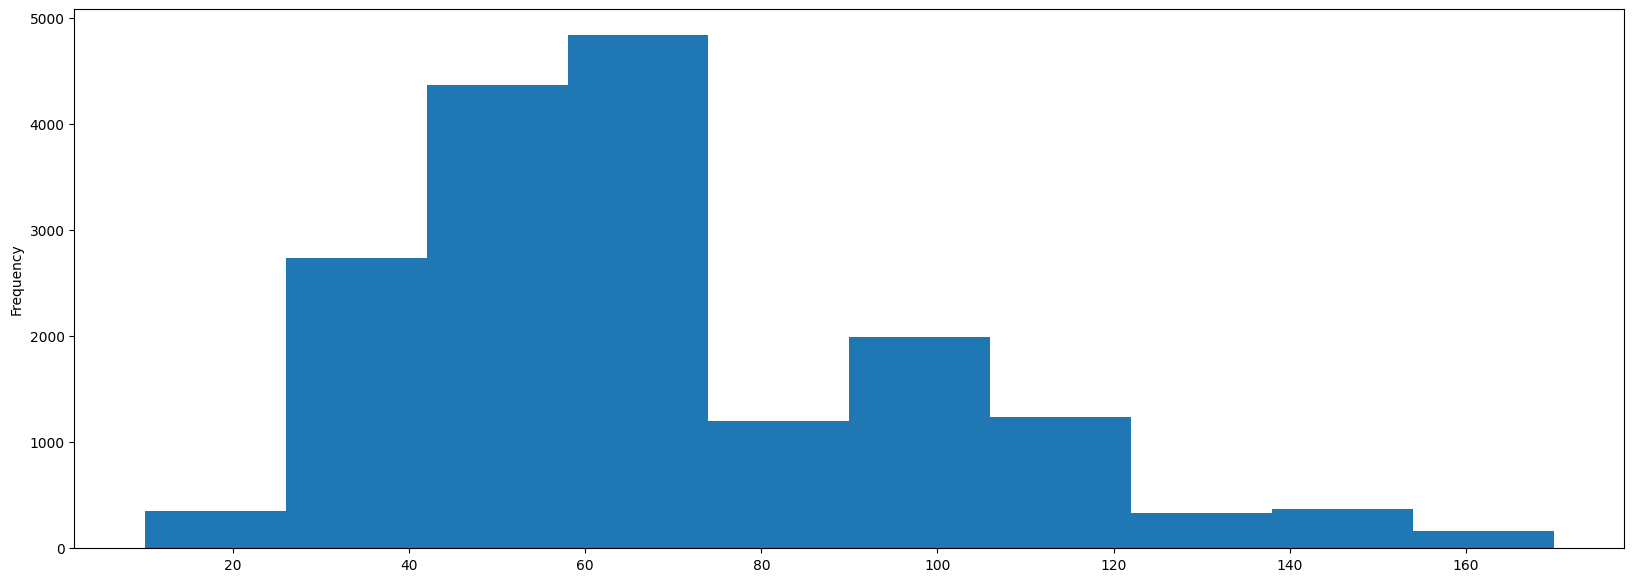

In [19]:
df['Appliances'].plot(kind="hist",figsize=(20, 7))
plt.show()

Comment:
- After remove outliers, the target variable is more likely to be normal distribution.

## Step3 : Correlation Study

In [20]:
corr_matrix = df.corr(method='pearson',numeric_only=True).round(3)
matrix = corr_matrix["Appliances"].sort_values(ascending=False)
print((matrix))

Appliances     1.000
Hour           0.417
lights         0.291
T8             0.268
T2             0.265
T1             0.248
T6             0.224
T_out          0.214
T4             0.196
T5             0.192
T3             0.180
T7             0.176
T9             0.154
Month          0.137
Tdewpoint      0.082
Days_num       0.077
RH_5           0.072
Windspeed      0.055
RH_1           0.046
Visibility    -0.025
RH_4          -0.037
RH_3          -0.088
Press_mm_hg   -0.090
RH_2          -0.110
RH_7          -0.129
RH_9          -0.202
RH_8          -0.219
RH_6          -0.240
RH_out        -0.253
Name: Appliances, dtype: float64


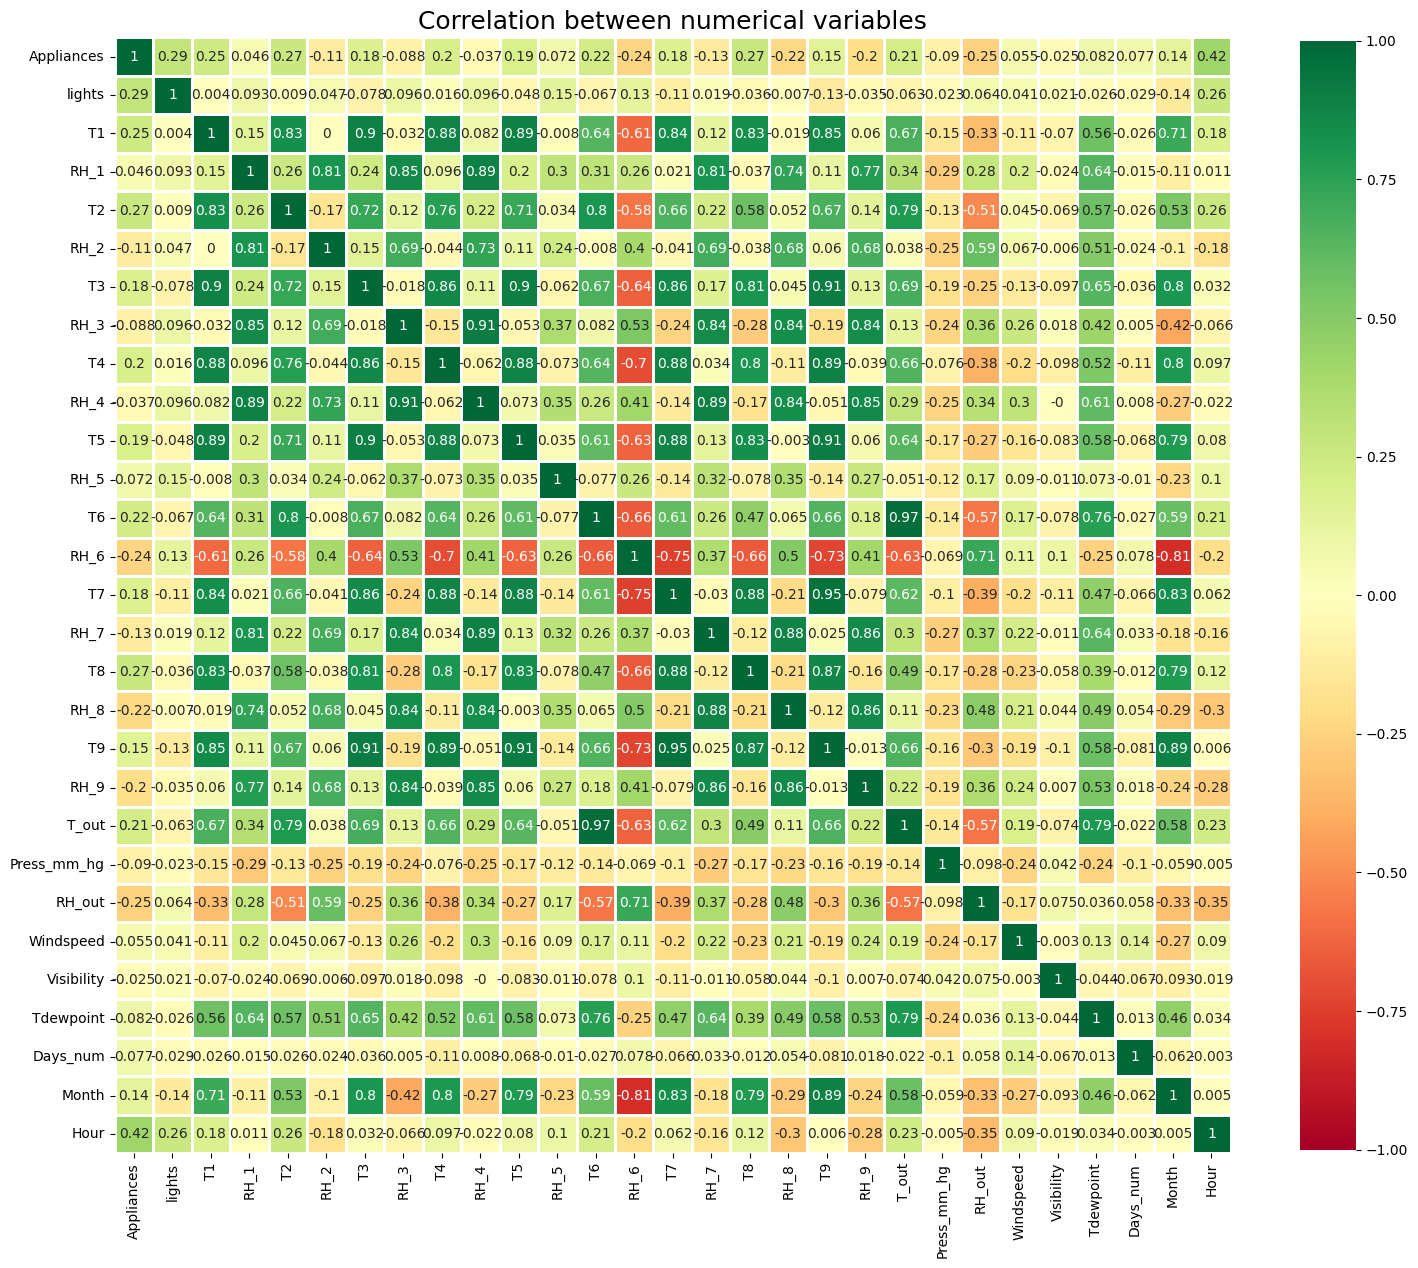

In [21]:
plt.figure(figsize = (18,18), dpi=100)
sns.heatmap(df.corr(method='pearson',numeric_only=True).round(3),square=True,annot=True,
            cbar_kws=dict(shrink=0.8),cmap='RdYlGn',vmin=-1,vmax=1,linewidths=2)
plt.title("Correlation between numerical variables", fontsize=18)
plt.show()

The Energy consumption is highly correlated with:

1. Hours : 0.417
2. Lights : 0.291
3. T8 : 0.268
4. T2 : 0.265

Also all temperature values inside house are highly correlated with each other (> 0.8)

## Step4 : Spliting Training and Test Set

In [22]:
from scipy import stats
from scipy.stats import zscore
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
from math import sqrt
from sklearn.preprocessing import StandardScaler

In [23]:
# Split the dataset
exclude = ['Appliances','Date','Days']
features = [f for f in df.columns if f not in exclude]

X = df[features].values
Y = df['Appliances'].values

In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

## Step5 : Build prediction model (Regression, Adaboost, Radom forest)

### Modeling

In [25]:
def result (y_pred_train, y_pred_test,y_train,y_test):
    print("train results")
    print("Mean absolute error =", round(sm.mean_absolute_error(y_train, y_pred_train), 2)) 
    print("Mean squared error =", round(sm.mean_squared_error(y_train, y_pred_train), 2)) 
    print("Median absolute error =", round(sm.median_absolute_error(y_train, y_pred_train), 2)) 
    print("Explain variance score =", round(sm.explained_variance_score(y_train, y_pred_train), 2)) 
    print("R2 score =", round(sm.r2_score(y_train, y_pred_train), 2))

    print("test results")
    print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_test), 2)) 
    print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_test), 2)) 
    print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_test), 2)) 
    print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_test), 2)) 
    print("R2 score =", round(sm.r2_score(y_test, y_pred_test), 2))

### Model comparison

In [26]:
def evaluate(X_train,y_train,X_test,y_test):
    model_data = []
    models = [
              ['Linear: ', LinearRegression()],
              ['Lasso: ', Lasso()],
              ['Ridge: ', Ridge()],
              ['RandomForest ',RandomForestRegressor()],
              ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
              ['AdaBoostRegressor: ',AdaBoostRegressor()]
              ]
    
            
    for name,curr_model in models :
        curr_model_data = {}
        curr_model.random_state = 42
        curr_model_data["Name"] = name
        start = time.time()
        
        curr_model.fit(X_train,y_train)
        end = time.time()
        curr_model_data["Train_Time"] = end - start
        curr_model_data["Train_R2_Score"] = r2_score(y_train,curr_model.predict(X_train))
        curr_model_data["Test_R2_Score"] = r2_score(y_test,curr_model.predict(X_test))
        curr_model_data["Test_MAE"] = (mean_absolute_error(y_test,curr_model.predict(X_test)))
        curr_model_data["Test_RMSE"] = sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
        mape = 100 * (abs(curr_model.predict(X_test) - y_test) / y_test)
        curr_model_data["Accuracy"] = 100 - np.mean(mape)
        model_data.append(curr_model_data)
        model_data_df = pd.DataFrame(model_data)
        
    return model_data_df

In [27]:
evaluate(X_train,y_train,X_test,y_test)

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_MAE,Test_RMSE,Accuracy
0,Linear:,0.024639,0.367822,0.341950,16.861566,23.039779,71.924622
1,Lasso:,0.305410,0.344917,0.324884,17.142114,23.336619,71.396042
2,Ridge:,0.012336,0.367822,0.341952,16.861575,23.039746,71.924553
3,RandomForest,17.835422,0.959112,0.695501,10.350625,15.672632,83.054077
4,GradientBoostingRegressor:,5.352249,0.574887,0.528371,13.624084,19.505135,77.044050
5,AdaBoostRegressor:,0.800570,0.295063,0.274174,18.505285,24.197193,65.826225


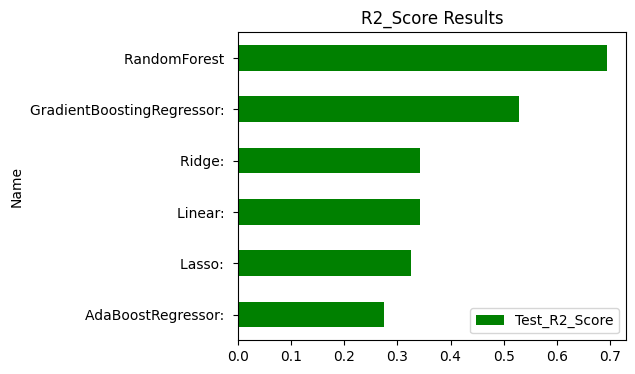

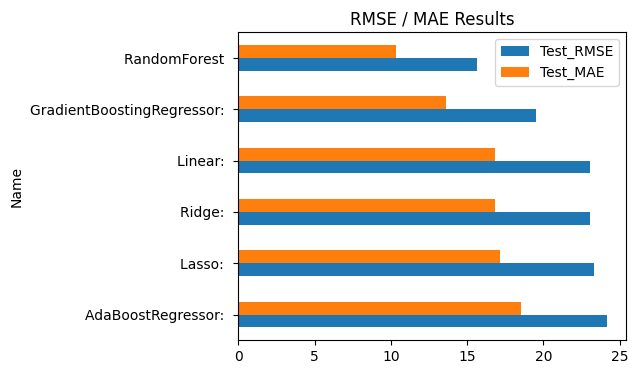

In [28]:
evaluate(X_train,y_train,X_test,y_test).sort_values('Test_R2_Score').plot.barh(x="Name", y=['Test_R2_Score'], title = 'R2_Score Results', color='g',figsize= (5,4));
evaluate(X_train,y_train,X_test,y_test).sort_values('Test_MAE',ascending=False).plot.barh(x="Name", y=['Test_RMSE','Test_MAE'], title = 'RMSE / MAE Results',figsize= (5,4));

**Observation**:
- The model which has **minimum RMSE** and **maximum r2** is performing the best. Hence, `RandomForest` will be selected for further tuning.
- test r2: 0.7
- test RMSE: 15.71

Scikit-learn RandomForest:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

## Step 6 : Cross-validation and Hyperparameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV, KFold

parameters = {
    'max_depth': [50,100,800],
    'min_samples_leaf': [1,2,5,8],
    'min_samples_split': [2,5,10,15],
    'n_estimators': [100,120,200],
    'random_state':[42]    
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
rbr = RandomForestRegressor()
rbr_cv = GridSearchCV(rbr, parameters, scoring='r2', cv=kfold, n_jobs=-1, verbose=3, error_score='raise')
rbr_cv

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise', estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [50, 100, 800],
                         'min_samples_leaf': [1, 2, 5, 8],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [100, 120, 200],
                         'random_state': [42]},
             scoring='r2', verbose=3)

In [38]:
rbr_cv.fit(X_train,y_train)
print("Best Parameters:",rbr_cv.best_params_)
print("Train R2 Score:",rbr_cv.best_score_)
print("Test R2 Score:",rbr_cv.score(X_test,y_test).round(3))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}
Train R2 Score: 0.6961631080909082
Test R2 Score: 0.693
[CV 2/5] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=120, random_state=42;, score=0.682 total time=  23.3s
[CV 4/5] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42;, score=0.695 total time=  40.9s
[CV 2/5] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42;, score=0.681 total time=  41.1s
[CV 4/5] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42;, score=0.690 total time=  20.6s
[CV 5/5] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=120, random_state=42;, score=0.702 total time=  25.4s
[CV 3/5] END max_depth=50, min_samples_leaf=1, min_samples_split=15, n_estimators

Fitting 5 folds for each of 144 candidates, totalling 720 fits<br>
Best Parameters: {'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}<br>
Train R2 Score: 0.6961631080909082<br>
Test R2 Score: 0.693

### Final Model

Model Train R-square: 0.932
Model test R-square: 0.693
The RMSE on training set: 7.407
The RMSE on test set: 15.746
Accuracy: 82.89 %.


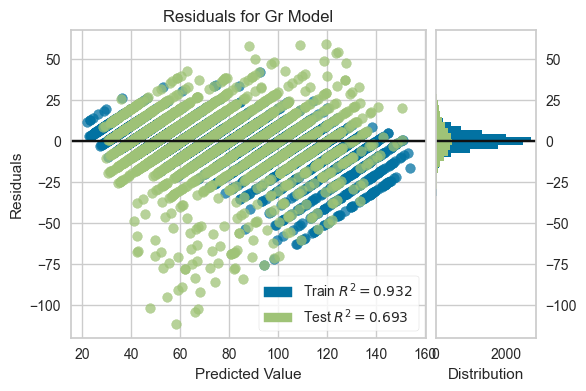

<Axes: title={'center': 'Residuals for Gr Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [39]:
from yellowbrick.regressor import ResidualsPlot
# Final Model
rbr_params = {
              'max_depth': 50,
              'n_estimators': 200,
              'min_samples_leaf': 2,
              'min_samples_split': 2
}

rbr = RandomForestRegressor(**rbr_params,random_state=42)
rbr.fit(X_train, y_train)

# Print results
print("Model Train R-square: %.3f" % rbr.score(X_train, y_train))
print("Model test R-square: %.3f" % rbr.score(X_test, y_test))
train_rmse = mean_squared_error(y_train, rbr.predict(X_train), squared=False)
test_rmse = mean_squared_error(y_test, rbr.predict(X_test), squared=False)
print("The RMSE on training set: {:.3f}".format(train_rmse))
print("The RMSE on test set: {:.3f}".format(test_rmse))

# Use the predict method on the test data
predictions = rbr.predict(X_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (abs(predictions - y_test) / y_test)

# Calculate accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

# Residual plot
fig,ax = plt.subplots(figsize=(6,4),dpi=100);
visualizer = ResidualsPlot(rbr, title='Residuals for Gr Model')
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)  # r2 score
visualizer.show() 

## Step 7 : Variable Importance

In [40]:
# Use the forest's predict method on the test data
predictions = rbr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 82.89 %.


In [43]:
# Saving feature names for later use
x = df[features]
factor_list = list(x.columns)
# Convert to numpy array
factors = np.array(x)
#Get numerical feature importances
importances = list(rbr.feature_importances_)
# List of tuples with variable and importance
factor_importances = [(factor, round(importance, 2)) 
    for factor, importance in zip(factor_list, importances)]

# Sort the feature importances by most important first
factor_importances = sorted(factor_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in factor_importances];

Variable: Hour                 Importance: 0.36
Variable: T8                   Importance: 0.09
Variable: lights               Importance: 0.04
Variable: RH_5                 Importance: 0.03
Variable: RH_9                 Importance: 0.03
Variable: Press_mm_hg          Importance: 0.03
Variable: T1                   Importance: 0.02
Variable: RH_1                 Importance: 0.02
Variable: T2                   Importance: 0.02
Variable: RH_2                 Importance: 0.02
Variable: T3                   Importance: 0.02
Variable: RH_3                 Importance: 0.02
Variable: T4                   Importance: 0.02
Variable: RH_4                 Importance: 0.02
Variable: T5                   Importance: 0.02
Variable: T6                   Importance: 0.02
Variable: RH_6                 Importance: 0.02
Variable: T7                   Importance: 0.02
Variable: RH_7                 Importance: 0.02
Variable: RH_8                 Importance: 0.02
Variable: T9                   Importanc

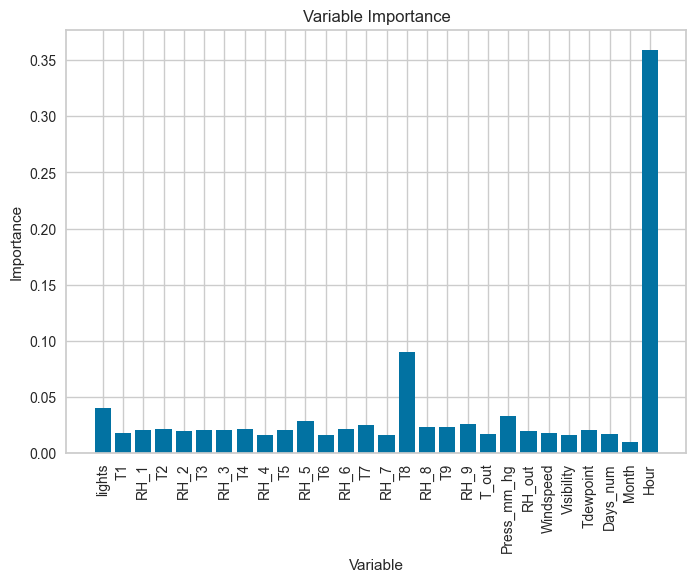

In [44]:
%matplotlib inline

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, factor_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); 
plt.title('Variable Importance');

### Conclusions

 1. Through Visualizing data and correlation analysis, it can be known that "hours" is highly correlated to the energy consumption of household appliances, the energy consumption is extremely low between 0am and 8am, and the highest usage around 5pm to 7pm.

 2. Teenager's room(`T8`) has the higher energy consumption than other rooms, so it is very important to raise the awareness of energy conservation and environmental protection among teenagers.

 3. There is a positive correlation between indoor temperature and electricity consumption. This is most likely due to the heater in the room. By providing better insulation in the house, we can effectively reduce energy consumption.

 4. Durung the model comparison, the model which has minimum RMSE and maximum r2 is performing the best. Hence, we choose RandomForest to further process.

 6. With RandoomForest Modeling, we can get the model with accurancy around 83%.